In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = 'AMZN'
start_date = '2018-01-01'
end_date = '2023-11-30'

In [3]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...
1483,2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100
1484,2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400
1485,2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400
1486,2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700


In [4]:
close = df['Close']

In [5]:
print(close.values)

[ 59.45050049  60.20999908  60.47949982 ... 147.72999573 147.02999878
 146.32000732]


In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(close.values.reshape(-1, 1))
data

array([[0.        ],
       [0.00597466],
       [0.00809471],
       ...,
       [0.69445798],
       [0.6889514 ],
       [0.68336619]])

In [7]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
train_data.shape, test_data.shape

((1190, 1), (298, 1))

In [8]:
test_data[20]

array([0.47096839])

In [9]:
past_values = 60
def data_preparation(data,past_values):
    X = []
    y = []
    for i in range(past_values, len(data)):
        X.append(data[i-60:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [10]:
X_train, y_train = data_preparation(train_data,past_values)
X_test, y_test = data_preparation(test_data,past_values)

In [11]:
X_train, y_train

(array([[[0.        ],
         [0.00597466],
         [0.00809471],
         ...,
         [0.14429279],
         [0.12116112],
         [0.09534691]],
 
        [[0.00597466],
         [0.00809471],
         [0.0157843 ],
         ...,
         [0.12116112],
         [0.09534691],
         [0.10160869]],
 
        [[0.00809471],
         [0.0157843 ],
         [0.02275801],
         ...,
         [0.09534691],
         [0.10160869],
         [0.07197138]],
 
        ...,
 
        [[0.44846996],
         [0.42298224],
         [0.37719873],
         ...,
         [0.5257198 ],
         [0.5040867 ],
         [0.51297597]],
 
        [[0.42298224],
         [0.37719873],
         [0.38915591],
         ...,
         [0.5040867 ],
         [0.51297597],
         [0.4935455 ]],
 
        [[0.37719873],
         [0.38915591],
         [0.36783748],
         ...,
         [0.51297597],
         [0.4935455 ],
         [0.46483246]]]),
 array([[0.10160869],
        [0.07197138],
        [0.

In [12]:
X_train.shape, y_train.shape

((1130, 60, 1), (1130, 1))

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0
# )
# model.fit(X_train, y_train, batch_size=200, epochs=500, verbose=1, callbacks=[callback])

Epoch 1/200
6/6 [==============================] - 19s 390ms/step - loss: 0.0976
Epoch 2/200
6/6 [==============================] - 3s 426ms/step - loss: 0.0238
Epoch 3/200
6/6 [==============================] - 3s 412ms/step - loss: 0.0189
Epoch 4/200
6/6 [==============================] - 2s 402ms/step - loss: 0.0100
Epoch 5/200
6/6 [==============================] - 3s 458ms/step - loss: 0.0061
Epoch 6/200
6/6 [==============================] - 3s 439ms/step - loss: 0.0050
Epoch 7/200
6/6 [==============================] - 2s 390ms/step - loss: 0.0041
Epoch 8/200
6/6 [==============================] - 2s 388ms/step - loss: 0.0036
Epoch 9/200
6/6 [==============================] - 2s 405ms/step - loss: 0.0033
Epoch 10/200
6/6 [==============================] - 2s 392ms/step - loss: 0.0033
Epoch 11/200
6/6 [==============================] - 2s 418ms/step - loss: 0.0032
Epoch 12/200
6/6 [==============================] - 2s 392ms/step - loss: 0.0031
Epoch 13/200
6/6 [==================

6/6 [==============================] - 2s 374ms/step - loss: 0.0011
Epoch 103/200
6/6 [==============================] - 2s 363ms/step - loss: 0.0011
Epoch 104/200
6/6 [==============================] - 2s 385ms/step - loss: 0.0011
Epoch 105/200
6/6 [==============================] - 2s 355ms/step - loss: 0.0011
Epoch 106/200
6/6 [==============================] - 2s 370ms/step - loss: 0.0011
Epoch 107/200
6/6 [==============================] - 2s 363ms/step - loss: 0.0011
Epoch 108/200
6/6 [==============================] - 2s 366ms/step - loss: 0.0011
Epoch 109/200
6/6 [==============================] - 2s 361ms/step - loss: 0.0011
Epoch 110/200
6/6 [==============================] - 2s 365ms/step - loss: 0.0011
Epoch 111/200
6/6 [==============================] - 2s 366ms/step - loss: 0.0010
Epoch 112/200
6/6 [==============================] - 2s 380ms/step - loss: 0.0010
Epoch 113/200
6/6 [==============================] - 2s 368ms/step - loss: 0.0011
Epoch 114/200
6/6 [===========

6/6 [==============================] - 2s 352ms/step - loss: 6.0202e-04
Epoch 199/200
6/6 [==============================] - 2s 377ms/step - loss: 5.7908e-04
Epoch 200/200
6/6 [==============================] - 2s 359ms/step - loss: 5.9051e-04


In [14]:
pred_train = model.predict(X_train)

36/36 [==============================] - 4s 49ms/step


In [15]:
pred_train

array([[0.13263527],
       [0.12349313],
       [0.111594  ],
       ...,
       [0.5211514 ],
       [0.5122187 ],
       [0.49694234]], dtype=float32)

In [16]:
mae = mean_absolute_error(y_train, pred_train)
print('mean absolute error-', mae)
mse = mean_squared_error(y_train, pred_train)
print('mean squared error-', mse)

mean absolute error- 0.021050002691017717
mean squared error- 0.0008193365884841739


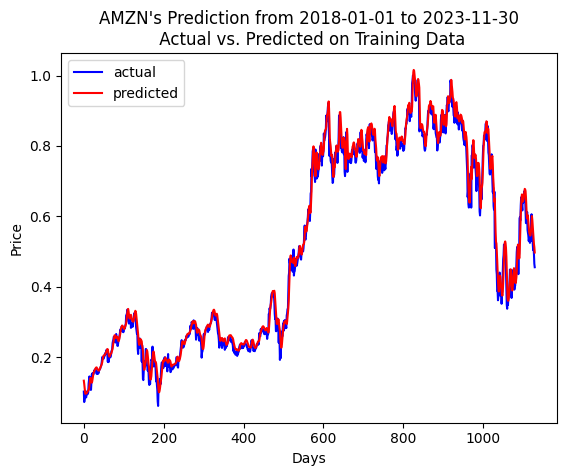

In [17]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_train, color='blue', label='actual')
plt.plot(pred_train, color='red', label='predicted')
plt.legend()

In [18]:
pred_test = model.predict(X_test)

8/8 [==============================] - 1s 81ms/step


In [19]:
mae = mean_absolute_error(y_test, pred_test)
print('mean absolute error-', mae)
mse = mean_squared_error(y_test, pred_test)
print('mean squared error-', mse)

mean absolute error- 0.0192898587002849
mean squared error- 0.000597999406494342


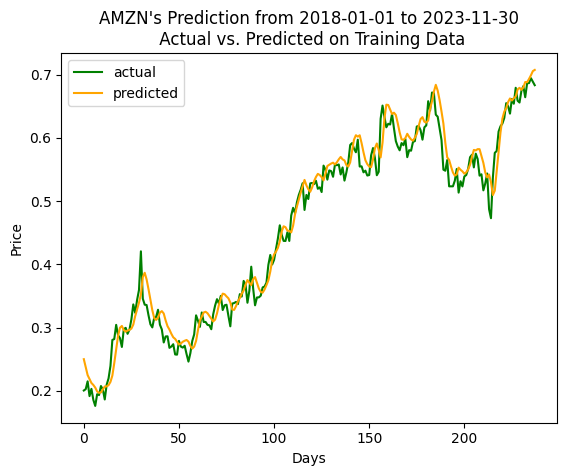

In [20]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_test, color='green', label='actual')
plt.plot(pred_test, color='orange', label='predicted')
plt.legend()

In [21]:
ticker = 'AMZN'
start_date = '2023-11-30'
end_date = '2023-12-30'
df_future = yf.download(ticker, start_date, end_date).reset_index()['Close']
df_future

[*********************100%***********************]  1 of 1 completed


0     146.089996
1     147.029999
2     144.839996
3     146.880005
4     144.520004
5     146.880005
6     147.419998
7     145.889999
8     147.479996
9     148.839996
10    147.419998
11    149.970001
12    154.070007
13    153.789993
14    152.119995
15    153.839996
16    153.419998
17    153.410004
18    153.339996
19    153.380005
20    151.940002
Name: Close, dtype: float64

In [22]:
df_future = df_future.values

In [23]:
future_data_to_predict = np.array(close[-60:])
future_data_to_predict

array([135.36000061, 137.8500061 , 138.22999573, 143.1000061 ,
       141.22999573, 144.8500061 , 144.72000122, 140.38999939,
       139.97999573, 137.63000488, 135.28999329, 129.33000183,
       129.11999512, 131.27000427, 125.98000336, 125.98000336,
       125.98000336, 127.12000275, 129.46000671, 124.72000122,
       127.        , 125.95999908, 127.95999908, 128.25999451,
       129.47999573, 131.83000183, 132.33000183, 129.78999329,
       132.55000305, 131.47000122, 128.13000488, 128.3999939 ,
       125.16999817, 126.55999756, 128.55999756, 121.38999939,
       119.56999969, 127.73999786, 132.71000671, 133.08999634,
       137.        , 138.07000732, 138.6000061 , 139.74000549,
       142.71000671, 142.08000183, 140.6000061 , 143.55999756,
       142.58999634, 145.80000305, 143.19999695, 142.83000183,
       145.17999268, 146.13000488, 143.8999939 , 146.71000671,
       146.74000549, 147.72999573, 147.02999878, 146.32000732])

In [24]:
last_val = future_data_to_predict[-1]
last_val

146.32000732421875

---------------------------------------------------------------------------------------------------------------------------

In [25]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []

    for i in range(days):
        
        if future_data[-1] == last_val:
            print('no')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 60, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)
        else:
            print('yes')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 60, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)

    return output_data
    

In [26]:
result = prediction(future_data_to_predict, last_val, len(df_future))
result = np.array(result)
result

no
before [135.36000061 137.8500061  138.22999573 143.1000061  141.22999573
 144.8500061  144.72000122 140.38999939 139.97999573 137.63000488
 135.28999329 129.33000183 129.11999512 131.27000427 125.98000336
 125.98000336 125.98000336 127.12000275 129.46000671 124.72000122
 127.         125.95999908 127.95999908 128.25999451 129.47999573
 131.83000183 132.33000183 129.78999329 132.55000305 131.47000122
 128.13000488 128.3999939  125.16999817 126.55999756 128.55999756
 121.38999939 119.56999969 127.73999786 132.71000671 133.08999634
 137.         138.07000732 138.6000061  139.74000549 142.71000671
 142.08000183 140.6000061  143.55999756 142.58999634 145.80000305
 143.19999695 142.83000183 145.17999268 146.13000488 143.8999939
 146.71000671 146.74000549 147.72999573 147.02999878 146.32000732]
1/1 [==============================] - 0s 95ms/step
output 148.99442
after [137.8500061  138.22999573 143.1000061  141.22999573 144.8500061
 144.72000122 140.38999939 139.97999573 137.63000488 135.2

1/1 [==============================] - 0s 51ms/step
output 154.24208
after [144.72000122 140.38999939 139.97999573 137.63000488 135.28999329
 129.33000183 129.11999512 131.27000427 125.98000336 125.98000336
 125.98000336 127.12000275 129.46000671 124.72000122 127.
 125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.
 138.07000732 138.6000061  139.74000549 142.71000671 142.08000183
 140.6000061  143.55999756 142.58999634 145.80000305 143.19999695
 142.83000183 145.17999268 146.13000488 143.8999939  146.71000671
 146.74000549 147.72999573 147.02999878 146.32000732 148.99441528
 149.6186676  150.65663147 151.81512451 153.01821899 154.24208069]
yes
before [144.72000122 140.38999939 139.97999573 137.63000488 135.28999329
 129.33000183 129.11999512 131.27000427 125.98000336 125.98000336
 125.

1/1 [==============================] - 0s 63ms/step
output 160.34734
after [129.33000183 129.11999512 131.27000427 125.98000336 125.98000336
 125.98000336 127.12000275 129.46000671 124.72000122 127.
 125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.
 138.07000732 138.6000061  139.74000549 142.71000671 142.08000183
 140.6000061  143.55999756 142.58999634 145.80000305 143.19999695
 142.83000183 145.17999268 146.13000488 143.8999939  146.71000671
 146.74000549 147.72999573 147.02999878 146.32000732 148.99441528
 149.6186676  150.65663147 151.81512451 153.01821899 154.24208069
 155.47294617 156.70178223 157.92404175 159.13873291 160.34733582]
yes
before [129.33000183 129.11999512 131.27000427 125.98000336 125.98000336
 125.98000336 127.12000275 129.46000671 124.72000122 127.
 125.95999908

1/1 [==============================] - 0s 54ms/step
output 166.3949
after [125.98000336 127.12000275 129.46000671 124.72000122 127.
 125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.
 138.07000732 138.6000061  139.74000549 142.71000671 142.08000183
 140.6000061  143.55999756 142.58999634 145.80000305 143.19999695
 142.83000183 145.17999268 146.13000488 143.8999939  146.71000671
 146.74000549 147.72999573 147.02999878 146.32000732 148.99441528
 149.6186676  150.65663147 151.81512451 153.01821899 154.24208069
 155.47294617 156.70178223 157.92404175 159.13873291 160.34733582
 161.55267334 162.75785828 163.96556091 165.17767334 166.39489746]
yes
before [125.98000336 127.12000275 129.46000671 124.72000122 127.
 125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 

1/1 [==============================] - 0s 64ms/step
output 172.51758
after [125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.
 138.07000732 138.6000061  139.74000549 142.71000671 142.08000183
 140.6000061  143.55999756 142.58999634 145.80000305 143.19999695
 142.83000183 145.17999268 146.13000488 143.8999939  146.71000671
 146.74000549 147.72999573 147.02999878 146.32000732 148.99441528
 149.6186676  150.65663147 151.81512451 153.01821899 154.24208069
 155.47294617 156.70178223 157.92404175 159.13873291 160.34733582
 161.55267334 162.75785828 163.96556091 165.17767334 166.39489746
 167.61695862 168.84248352 170.06950378 171.29544067 172.51757812]


array([148.99442, 149.61867, 150.65663, 151.81512, 153.01822, 154.24208,
       155.47295, 156.70178, 157.92404, 159.13873, 160.34734, 161.55267,
       162.75786, 163.96556, 165.17767, 166.3949 , 167.61696, 168.84248,
       170.0695 , 171.29544, 172.51758], dtype=float32)

In [29]:
days = list(range(1,22))

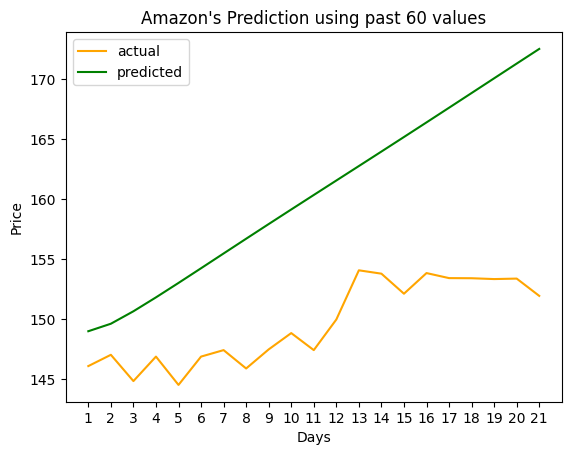

In [48]:
# plt.figure(figsize= (8,8))
plt.title(f"Amazon's Prediction using past {len(future_data_to_predict)} values")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(days, df_future, color='orange', label='actual')
plt.plot(days, result, color='green', label='predicted')
plt.xticks(days, days)
plt.legend()

In [51]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [52]:
controls_actual = get_control_vector(df_future)
amount_actual = buy_and_sell_bot(df_future, controls_actual)

In [53]:
controls_pred= get_control_vector(np.array(result))
amount_pred = buy_and_sell_bot(result, controls_pred)
controls_pred,amount_pred

IndexError: index -1 is out of bounds for axis 0 with size 0

# --------------------------------------------------------------------------------------------------------------

In [58]:
ticker = 'AMZN'
start_date = '2023-10-05'
end_date = '2023-12-30'
x = yf.download(ticker, start_date, end_date).reset_index()
x

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-05,126.709999,126.730003,124.330002,125.959999,125.959999,39660600
1,2023-10-06,124.160004,128.449997,124.129997,127.959999,127.959999,46795900
2,2023-10-09,126.220001,128.789993,124.760002,128.259995,128.259995,38773700
3,2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600
4,2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800
5,2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600
6,2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600
7,2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900
8,2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600
9,2023-10-18,129.899994,130.669998,127.510002,128.130005,128.130005,42699500


In [59]:
x = x['Close'].values
x

array([125.95999908, 127.95999908, 128.25999451, 129.47999573,
       131.83000183, 132.33000183, 129.78999329, 132.55000305,
       131.47000122, 128.13000488, 128.3999939 , 125.16999817,
       126.55999756, 128.55999756, 121.38999939, 119.56999969,
       127.73999786, 132.71000671, 133.08999634, 137.        ,
       138.07000732, 138.6000061 , 139.74000549, 142.71000671,
       142.08000183, 140.6000061 , 143.55999756, 142.58999634,
       145.80000305, 143.19999695, 142.83000183, 145.17999268,
       146.13000488, 143.8999939 , 146.71000671, 146.74000549,
       147.72999573, 147.02999878, 146.32000732, 146.08999634,
       147.02999878, 144.83999634, 146.88000488, 144.52000427,
       146.88000488, 147.41999817, 145.88999939, 147.47999573,
       148.83999634, 147.41999817, 149.97000122, 154.07000732,
       153.78999329, 152.11999512, 153.83999634, 153.41999817,
       153.41000366, 153.33999634, 153.38000488, 151.94000244])

In [60]:
x[-1]

151.94000244140625

In [61]:
days = 1

In [64]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []
        
    if future_data[-1] == last_val:
        print('no')
        print('before',future_data)
        temp = scaler.transform(future_data.reshape(-1, 1))
        temp_scaled_reshape = temp.reshape(1, 60, 1)
        predicted_value = model.predict(temp_scaled_reshape)
        actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
        output_data.append(actual_predicted[0,0])
        print('output',actual_predicted[0,0])
        future_data = future_data[1:]
        future_data = np.append(future_data,actual_predicted)
        print('after',future_data)
    else:
        print('yes')
        print('before',future_data)
        temp = scaler.transform(future_data.reshape(-1, 1))
        temp_scaled_reshape = temp.reshape(1, 60, 1)
        predicted_value = model.predict(temp_scaled_reshape)
        actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
        output_data.append(actual_predicted[0,0])
        print('output',actual_predicted[0,0])
        future_data = future_data[1:]
        future_data = np.append(future_data,actual_predicted)
        print('after',future_data)

    return output_data

In [65]:
prediction(x, x[-1], days)

no
before [125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.
 138.07000732 138.6000061  139.74000549 142.71000671 142.08000183
 140.6000061  143.55999756 142.58999634 145.80000305 143.19999695
 142.83000183 145.17999268 146.13000488 143.8999939  146.71000671
 146.74000549 147.72999573 147.02999878 146.32000732 146.08999634
 147.02999878 144.83999634 146.88000488 144.52000427 146.88000488
 147.41999817 145.88999939 147.47999573 148.83999634 147.41999817
 149.97000122 154.07000732 153.78999329 152.11999512 153.83999634
 153.41999817 153.41000366 153.33999634 153.38000488 151.94000244]
1/1 [==============================] - 0s 51ms/step
output 154.55377
after [127.95999908 128.25999451 129.47999573 131.83000183 132.33000183
 129.78999329 132.55000305 131.47000122 128.13000488 128.3999939

[154.55377]

In [68]:
ticker = 'AMZN'
start_date = '2024-01-01'
end_date = '2024-01-03'
x = yf.download(ticker, start_date, end_date).reset_index()
x

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400
